# Literature Analyses

This notebook analyses the collected and curated literature data for the aperiodic-clinical project. 

In [1]:
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from lisc.plts.words import plot_years

In [2]:
# Import local code
from local.utils import min_count, replace_multi_str, replace_multi_int, replace_other
from local.plts import plot_hist, savefig

In [3]:
import seaborn as sns
sns.set_context('paper')

## Settings

In [4]:
# Define figure save path folder
save_folder = Path('./figs/')

In [5]:
# Set the notebook run settings 
SAVE_FIG = False

## Load the Data

In [6]:
# Set the file name
file_foler = Path('../data/')
file_name = 'apc_data.csv'

In [7]:
# Load the data
df = pd.read_csv(file_foler / file_name, skiprows=[0])

In [8]:
# Check the columns
df.columns

Index(['Disorder', 'Authors', 'Year', 'Month', 'DOI', 'Title', 'Journal',
       'Data', 'Analyzed Data', 'Amount of Data', 'Design', 'Analysis',
       '# Patients', 'Patient Ages', '# Control', 'Control Ages', 'Fit Method',
       'Fit Range', 'Report Settings', 'Report GOF', 'Clinical EXP',
       'Control EXP', 'Reported Finding for Aperiodic Exponent',
       'Report Effects Size', 'Effect Size Measure', 'Effects Size',
       'Biomarker', 'Interpretation', 'Notes'],
      dtype='object')

#### Clean up the loaded data

In [9]:
# Drop the null rows
df = df.dropna()

#### Manage column types

In [10]:
# Set years as integers
df['Year'] = df['Year'].astype('int')

In [11]:
# For months - set missing data as '1', and typecast to int
df['Month'].values[df['Month'].values == '-'] = '1'
df['Month'] = df['Month'].astype('int')

#### Participant Numbers

In [12]:
# Replace multiple values per entry with the sum
df = replace_multi_int(df, '# Patients')
df = replace_multi_int(df, '# Control')

In [13]:
# Null out the control counts for reports with no values
df['# Control'].values[df['# Control'] == '-'] = np.nan

In [14]:
# Convert participant number columns to numbers
df['# Patients'] = df['# Patients'].astype('float')
df['# Control'] = df['# Control'].astype('float')

#### Check loaded dataframe

In [15]:
# Check some example rows
df.head(2)

,Disorder,Authors,Year,Month,DOI,Title,Journal,Data,Analyzed Data,Amount of Data,...,Report GOF,Clinical EXP,Control EXP,Reported Finding for Aperiodic Exponent,Report Effects Size,Effect Size Measure,Effects Size,Biomarker,Interpretation,Notes
1,ADHD,Robertson et al,2019,10,10.1152/jn.00388.2019,EEG Power Spectral Slope differs by ADHD statu...,Journal of Neurophysiology,EEG,resting,7m,...,no,1.67 +/- 0.27,1.51 +/- 0.32,⬆︎ clinical vs. control ⬇︎ w medication,yes,eta-squared,0.088,yes,E/I ratio,Are multiple datasets / subsets included and a...
2,ADHD,Pertermann et al,2019,8,10.1016/j.bpsc.2019.03.011,The Modulation of Neural Noise Underlies the E...,Biological Psychiatry: Cognitive Neuroscience ...,EEG,task,1s,...,-,unclear,unclear,⬇︎ clinical vs. control ⬆︎ w medication,no,-,-,no,neural noise,Measurement is a little unclear - is a “neural...


In [16]:
# Check the number of articles
n_articles = len(df)
print('Number of articles: {}'.format(n_articles))

Number of articles: 141


## Disorders

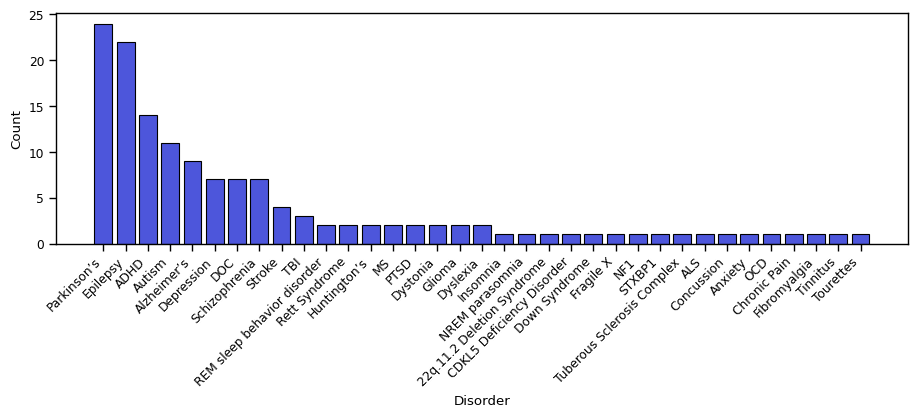

In [17]:
# Plot the histogram of disorders
plot_hist(df, 'Disorder', figsize=(11, 3))

In [18]:
# Compute the disorder counts
disorder_counts = Counter(df['Disorder'])

In [19]:
# Check the number of disorders
n_disorders = len(disorder_counts)
print('Number of disorders: {}'.format(n_disorders))

Number of disorders: 35


In [20]:
# # Check the set of disorders with a minimum number of reports (sorted by count)
# min_n_disorders = 5
# main_disorders = [label for label, count in disorder_counts.items() if count >= min_n_disorders]
# main_disorders = disorder_counts.most_common(len(main_disorders))
# main_disorders = [el[0] for el in main_disorders]

In [21]:
# # Set order of the methods for plotting
# cdf = df.copy()
# cdf['Disorder'] = pd.Categorical(cdf['Disorder'], main_disorders)

In [22]:
# # Plot the histogram of disorders
# plot_hist(cdf, 'Disorder')

In [23]:
# # Set order of the methods for plotting
# cdf = df.copy()
# cdf['Disorder'] = pd.Categorical(cdf['Disorder'], main_disorders + ['Other'])
# cdf['Disorder'].values[pd.isna(cdf['Disorder'])] = 'Other'

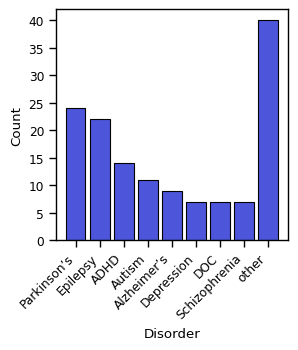

In [24]:
# Plot the histogram of disorders
#plot_hist(cdf, 'Disorder', end_label='Other')
plot_hist(replace_other(df, 'Disorder', 5), 'Disorder', end_label='other')
savefig(SAVE_FIG, 'reports-disorders.pdf', save_folder)

## Design

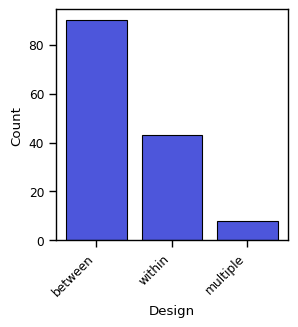

In [25]:
# Plot the histogram of design
df = replace_multi_str(df, 'Design')
plot_hist(df, 'Design')
savefig(SAVE_FIG, 'reports-design.pdf', save_folder)

### Analysis

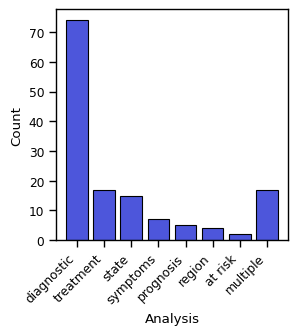

In [26]:
# Plot the histogram of analysis
df = replace_multi_str(df, 'Analysis')
plot_hist(df, 'Analysis', end_label='multiple')
savefig(SAVE_FIG, 'reports-analysis.pdf', save_folder)

## Publication Data

In [27]:
# Compute the counts per journal
journal_counts = Counter(df['Journal'].values)

In [28]:
n_preprints = journal_counts.pop('preprint')
print('Number of preprints: {}'.format(n_preprints))

Number of preprints: 17


In [29]:
# Check the number of journals
n_journals = len(journal_counts)
print('Number of journals: {}'.format(n_journals))

Number of journals: 77


In [30]:
# Check the most common journals
journal_counts.most_common(5)

[('Brain Communications', 6),
 ('Scientific Reports', 5),
 ('Translational Psychiatry', 4),
 ("NPJ Parkinson's Disease", 4),
 ('Journal of Neurophysiology', 3)]

### Check other values

In [31]:
# Check that publication details are unique values
assert len(set(df['DOI'])) == len(df['DOI'])
assert len(set(df['Title'])) == len(df['Title'])

### Publication Years

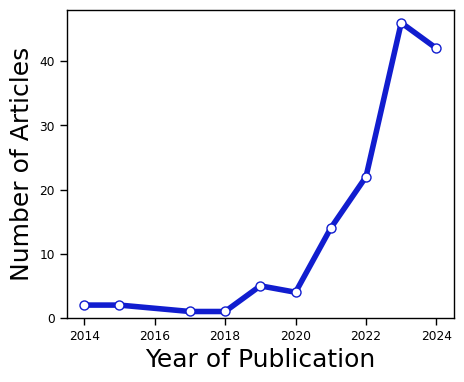

In [32]:
# Plot counts by years
#   Note: in this plot most years are full year, but 2024 is 6 months
year_counts = Counter(df['Year'])
plot_years(year_counts, year_range=[2014, 2024], lw=4, ms=13, color='#111dcf', figsize=(5, 4))

In [33]:
# Create version of years split by 6 months
half_years = df['Year'].values + (df['Month'] > 6) * 0.5
half_year_counter = Counter(half_years)

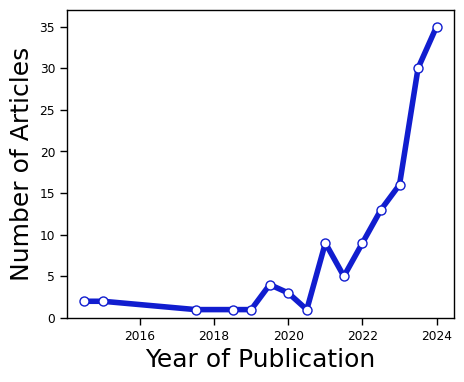

In [34]:
# Plot the reports across years, with 6 month datapoints
plot_years(half_year_counter, year_range=[2014, 2024], lw=4, ms=13, color='#111dcf', figsize=[5, 4])
savefig(SAVE_FIG, 'reports-years.pdf', save_folder)

## Recording Information

### Data Modality

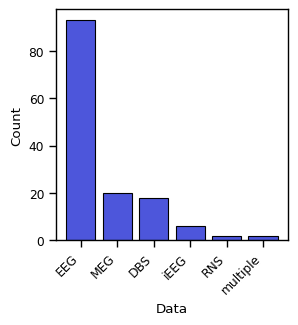

In [35]:
# Plot the histogram of data modalities
df = replace_multi_str(df, 'Data')
plot_hist(df, 'Data', end_label='multiple')
savefig(SAVE_FIG, 'reports-modalities.pdf', save_folder)

### Analyzed Data

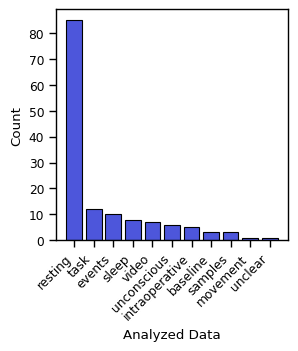

In [36]:
# Plot histogram of analyzed data
plot_hist(df, 'Analyzed Data', end_label='unclear')
savefig(SAVE_FIG, 'reports-analyzed-data.pdf', save_folder)

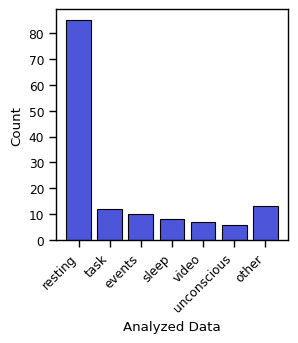

In [37]:
#plot_hist(cdf, '', end_label='other')
plot_hist(replace_other(df, 'Analyzed Data', 6), 'Analyzed Data', end_label='other')
savefig(SAVE_FIG, 'reports-analyzed-data-min.pdf', save_folder)

In [38]:
# Set main values for analyzed data 
main_data = ['resting', 'task', 'events', 'sleep', 'video', 'unconscious']

In [39]:
# TEMP
cdf = df.copy()

In [40]:
# Set order of the methods for plotting
cdf['Analyzed Data'] = pd.Categorical(cdf['Analyzed Data'], main_data + ['other'])
cdf['Analyzed Data'].values[pd.isna(cdf['Analyzed Data'])] = 'other'

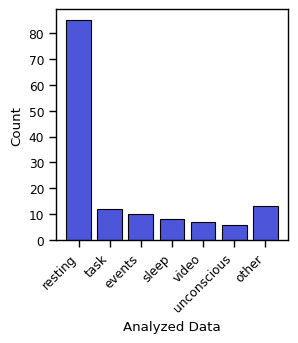

In [41]:
# Plot histogram of analyzed data
plot_hist(cdf, 'Analyzed Data', end_label='other')

## Dataset Information

In [42]:
print('Average # patients: \t{:1.0f}'.format(np.nanmedian(df['# Patients'])))
print('Average # controls: \t{:1.0f}'.format(np.nanmedian(df['# Control'])))

Average # patients: 	36
Average # controls: 	35


## Method Information

### Fit Methods

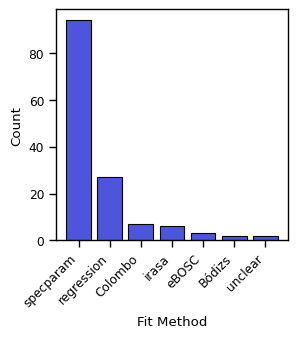

In [43]:
# Plot the histogram of fit methods
plot_hist(df, 'Fit Method', end_label='unclear')
savefig(SAVE_FIG, 'reports-fitmethod.pdf', save_folder)

## Results Information

### Interpretation

In [44]:
# # Set order of the methods for plotting
# df['Interpretation'] = pd.Categorical(\
#     df['Interpretation'], ['E/I ratio', 'slowing', 'neural noise', 'oscillations',
#                            'synchronicity', 'complexity', 'criticality', 
#                            'timescale', 'integration', 'neurotransmission', 'unclear'])

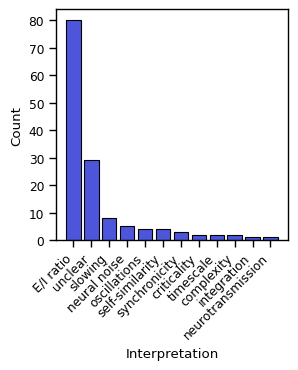

In [45]:
# Plot histogram of interpretations
plot_hist(df, 'Interpretation')
savefig(SAVE_FIG, 'reports-interpretations_all.pdf', save_folder)

In [46]:
# Replace low occuring interpretations with 'other'
replace_interps = ['complexity', 'criticality', 'timescale', 'integration', 'neurotransmission']

In [47]:
df = df.replace(replace_interps, 'other')

In [48]:
# # Set order of the methods for plotting
# df['Interpretation'] = pd.Categorical(\
#     df['Interpretation'], ['E/I ratio', 'slowing', 'neural noise', 'oscillations',
#                            'synchronicity', 'other', 'unclear'])

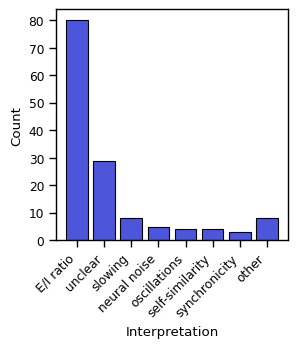

In [49]:
# Plot histogram of interpretations - sub-selected
plot_hist(min_count(df, 'Interpretation', 2), 'Interpretation', end_label='other')
savefig(SAVE_FIG, 'reports-interpretations_min.pdf', save_folder)

### Biomarker

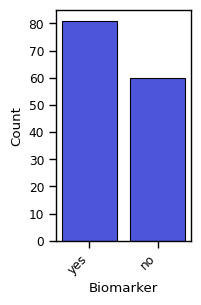

In [50]:
# Plot histogram of biomarker
plot_hist(df, 'Biomarker', figsize=(1.75, 3))
savefig(SAVE_FIG, 'reports-biomarker.pdf', save_folder)

### Report Values

In [51]:
# Get the subset of rows that report a clinical exponent 
dfr = df[np.logical_and(df['Clinical EXP'] != '-', df['Clinical EXP'] != 'unclear')]
len(dfr)

26

### Effect Size

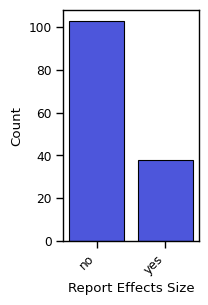

In [52]:
# Plot histogram of effect size
plot_hist(df, 'Report Effects Size', figsize=(1.75, 3))
savefig(SAVE_FIG, 'reports-effectsize.pdf', save_folder)

In [53]:
# df['Effect Size Measure'] = pd.Categorical(\
#     df['Effect Size Measure'], ["cohen's-d", 'eta-squared', 'z-score', 'AUC',
#                                 'biserial rank correlation', "cohen’s f^2", 'log(odds)', 'unclear'])

In [54]:
#dfe['Effect Size Measure']

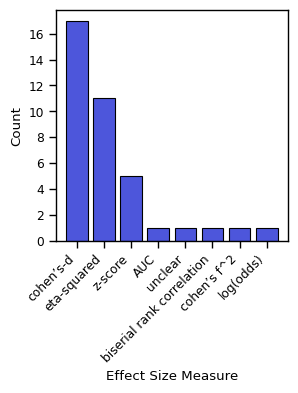

In [55]:
# Plot histogram of effect size - subselected for those that report
dfe = df[df['Effect Size Measure'] != '-']
plot_hist(dfe, 'Effect Size Measure')
savefig(SAVE_FIG, 'effectsize-measures.pdf', save_folder)

## Method Reporting

In [56]:
# Subselect to specparam fitting method
cdf = df[df['Fit Method'] == 'specparam'].copy()

In [57]:
# Compute how many reports report settings & GOF
rep_set = sum(cdf['Report Settings'] == 'yes') / len(cdf)
rep_gof = sum(cdf['Report GOF'] == 'yes') / len(cdf)

In [58]:
print('Reports settings:   {:4.2f}%'.format(rep_set * 100))
print('Reports GOF:        {:4.2f}%'.format(rep_gof * 100))

Reports settings:   55.32%
Reports GOF:        29.79%


In [59]:
# Order values for plotting 
cdf['Report Settings'] = pd.Categorical(cdf['Report Settings'], ['yes', 'no'])
cdf['Report GOF'] = pd.Categorical(cdf['Report GOF'], ['yes', 'no'])

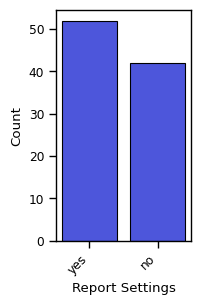

In [60]:
# Plot settings reporting
plot_hist(cdf, 'Report Settings', figsize=(1.75, 3))

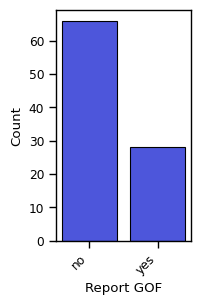

In [61]:
# Plot GOF reporting
plot_hist(cdf, 'Report GOF', figsize=(1.75, 3))